DNN based Combinational QSAR model development 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.


In [30]:
concatenated_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1,Combo IC50
0,-0.594742,-0.594742,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-0.255221,-0.158462,...,-0.769550,-0.499326,-0.555155,0.264339,-0.473616,-0.447850,-0.070525,-0.613131,-0.826328,12.690692
1,-0.683066,-0.683066,0.0,0.0,0.778971,0.778971,0.745955,-1.303838,0.662210,0.772391,...,-0.206117,0.054180,-0.658952,-0.864448,-0.426859,-0.247622,0.269824,-0.910423,-0.109546,15.350248
2,1.083119,1.083119,0.0,0.0,-1.403398,-1.403398,-0.796785,0.759422,-0.544596,-0.468959,...,-0.415908,0.547891,-1.658487,0.263687,-1.071368,-1.231359,-2.329312,-1.258447,-1.017625,10.710601
3,0.615130,0.615130,0.0,0.0,0.362013,0.362013,0.210389,0.038221,0.807659,0.878693,...,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116,8.545300
4,1.126420,1.126420,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,-1.177607,-1.148174,...,0.370918,0.127499,-0.161969,-1.216652,-0.590462,-0.288751,-0.044123,-0.598535,-0.338686,8.351068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143607,-1.373184,-1.373184,0.0,0.0,-0.411232,-0.411232,0.210389,-0.805546,-0.972988,-0.928620,...,-0.641391,0.717184,-1.227046,-0.240562,-0.819111,-0.723829,-1.674816,-1.103345,-0.707052,14.614905
143608,-0.982697,-0.982697,0.0,0.0,0.129245,0.129245,0.210389,0.038221,1.295998,1.323176,...,0.121220,0.738434,0.587082,1.548027,0.878676,0.867161,0.522169,0.940913,0.268076,10.885169
143609,0.994817,0.994817,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-2.128216,-2.168169,...,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047,5.535373
143610,1.415486,1.415486,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,0.404717,0.491596,...,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521,13.208833


In [32]:
has_negative_values = (concatenated_df['Combo IC50']<0).any()
if has_negative_values:
    print('presence')
else:
    print('absent')

absent


In [33]:
concatenated_df.columns.to_list()

['Cell Line name',
 'SDIM',
 'Tissue',
 'Cancer Type',
 'Anchor Name',
 'Anchor Target',
 'Anchor Pathway',
 'Anchor Conc',
 'Library Name',
 'library Target',
 ' Library Pathway',
 'Maxc',
 'Library IC50',
 'Library Emax',
 'Bliss Emax',
 'Combo Emax',
 'Delta Xmid',
 'Delta Emax',
 'Synergy?',
 'ATS1p_x',
 'apol_x',
 'Sp_x',
 'ATS0v_x',
 'ZMIC0_x',
 'ATS1v_x',
 'Sv_x',
 'ATSC0v',
 'McGowan_Volume_x',
 'CrippenMR',
 'ATS2p_x',
 'nBonds2',
 'nHeavyAtom_x',
 'ATS2v_x',
 'ATS3p_x',
 'WTPT-1_x',
 'VR3_D',
 'ATS1i',
 'nAtom',
 'Spe',
 'Sare',
 'ATS3v_x',
 'Si',
 'nBonds',
 'nC',
 'nBondsS3',
 'ATS0p',
 'TIC1',
 'ATS4p',
 'ATS0i',
 'Zagreb_x',
 'TIC4',
 'TIC5',
 'nBondsS',
 'nBondsS2',
 'TIC3',
 'ATS2e',
 'AMR_x',
 'TIC2',
 'MPC2',
 'ATSC1m_x',
 'AATSC0v',
 'PetitjeanNumber',
 'AATS4i',
 'AATS4e',
 'AATS3e',
 'AATS3i',
 'VE1_Dt',
 'SIC3',
 'SIC4',
 'AATSC0p',
 'SIC5',
 'AATSC1m_x',
 'BIC3',
 'AATSC2c_x',
 'topoShape_x',
 'topoRadius_x',
 'WPATH_x',
 'SpAD_D_x',
 'SpMax_D_x',
 'SpDiam_D_x',


In [34]:
X = concatenated_df.drop('Combo IC50', axis = 1)
X

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,-0.594742,-0.594742,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-0.255221,-0.158462,...,-0.555155,-0.769550,-0.499326,-0.555155,0.264339,-0.473616,-0.447850,-0.070525,-0.613131,-0.826328
1,-0.683066,-0.683066,0.0,0.0,0.778971,0.778971,0.745955,-1.303838,0.662210,0.772391,...,-0.658952,-0.206117,0.054180,-0.658952,-0.864448,-0.426859,-0.247622,0.269824,-0.910423,-0.109546
2,1.083119,1.083119,0.0,0.0,-1.403398,-1.403398,-0.796785,0.759422,-0.544596,-0.468959,...,-1.658487,-0.415908,0.547891,-1.658487,0.263687,-1.071368,-1.231359,-2.329312,-1.258447,-1.017625
3,0.615130,0.615130,0.0,0.0,0.362013,0.362013,0.210389,0.038221,0.807659,0.878693,...,0.229506,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116
4,1.126420,1.126420,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,-1.177607,-1.148174,...,-0.161969,0.370918,0.127499,-0.161969,-1.216652,-0.590462,-0.288751,-0.044123,-0.598535,-0.338686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143607,-1.373184,-1.373184,0.0,0.0,-0.411232,-0.411232,0.210389,-0.805546,-0.972988,-0.928620,...,-1.227046,-0.641391,0.717184,-1.227046,-0.240562,-0.819111,-0.723829,-1.674816,-1.103345,-0.707052
143608,-0.982697,-0.982697,0.0,0.0,0.129245,0.129245,0.210389,0.038221,1.295998,1.323176,...,0.587082,0.121220,0.738434,0.587082,1.548027,0.878676,0.867161,0.522169,0.940913,0.268076
143609,0.994817,0.994817,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-2.128216,-2.168169,...,0.339178,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047
143610,1.415486,1.415486,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,0.404717,0.491596,...,1.350208,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521


In [35]:
Y = concatenated_df['Combo IC50']
Y = pd.DataFrame(Y)
Y

,Combo IC50
0,12.690692
1,15.350248
2,10.710601
3,8.545300
4,8.351068
...,...
143607,14.614905
143608,10.885169
143609,5.535373
143610,13.208833


Epoch 1/50
1179/1179 [==============================] - 70s 59ms/step - loss: 2.2539 - val_loss: 0.6581
Epoch 2/50
1179/1179 [==============================] - 69s 59ms/step - loss: 0.6390 - val_loss: 0.5380
Epoch 3/50
1179/1179 [==============================] - 69s 59ms/step - loss: 0.4651 - val_loss: 0.5951
Epoch 4/50
1179/1179 [==============================] - 69s 59ms/step - loss: 0.3853 - val_loss: 0.2722
Epoch 5/50
1179/1179 [==============================] - 69s 59ms/step - loss: 0.3432 - val_loss: 0.4688
Epoch 6/50
1179/1179 [==============================] - 70s 59ms/step - loss: 0.3036 - val_loss: 0.2740
Epoch 7/50
1179/1179 [==============================] - 70s 60ms/step - loss: 0.2788 - val_loss: 0.2039
Epoch 8/50
1179/1179 [==============================] - 69s 59ms/step - loss: 0.2684 - val_loss: 0.3798
Epoch 9/50
1179/1179 [==============================] - 69s 58ms/step - loss: 0.2347 - val_loss: 0.1234
Epoch 10/50
1179/1179 [==============================] - 68s 58m

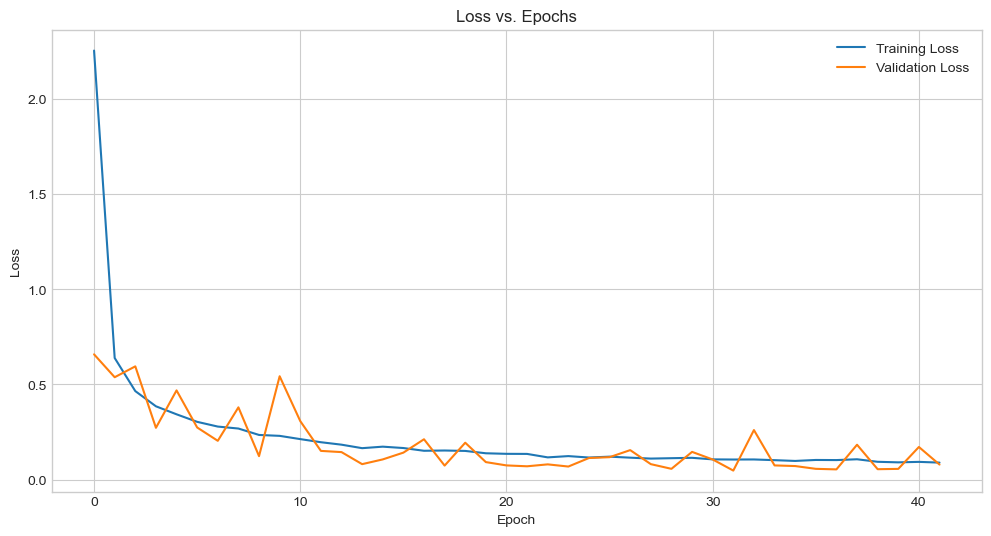

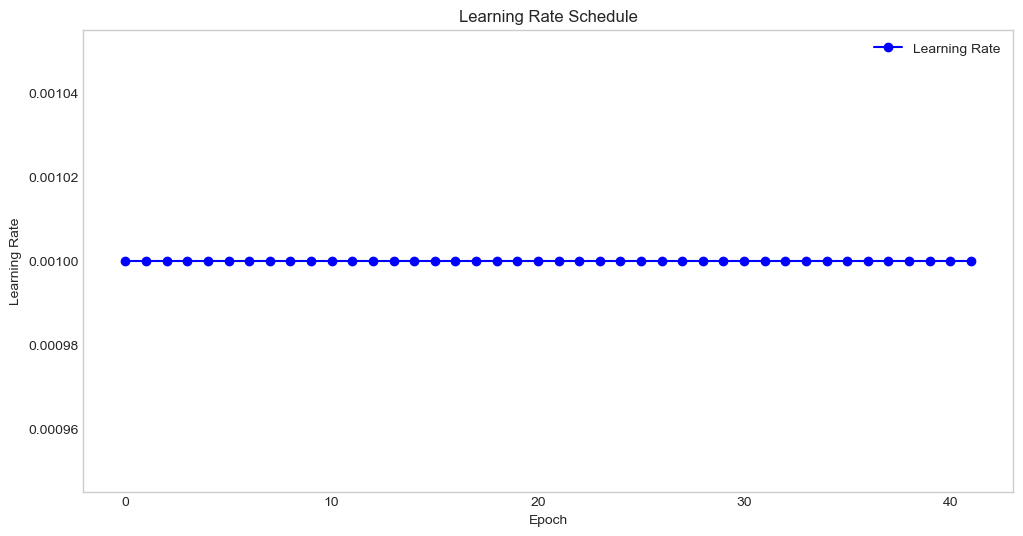

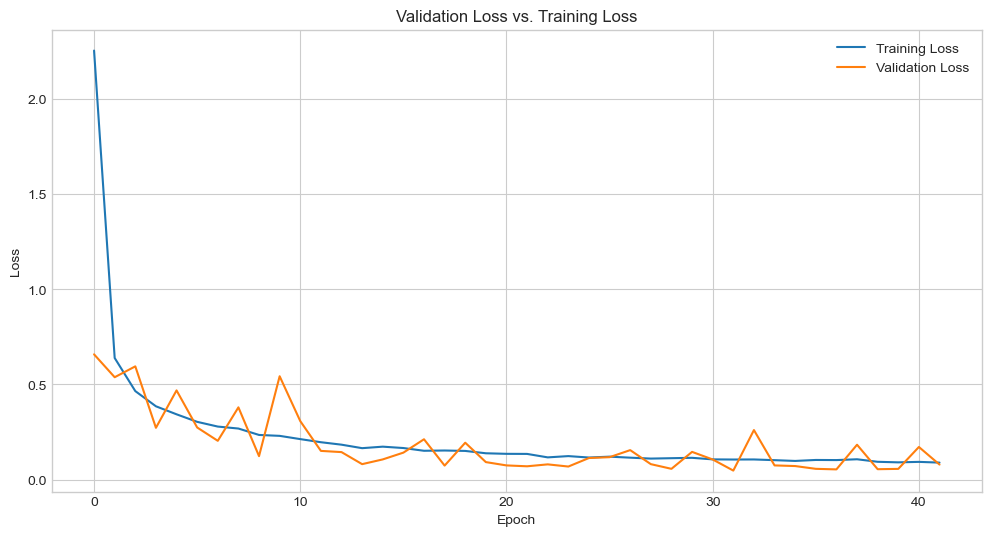

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\2037702613.py:136: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


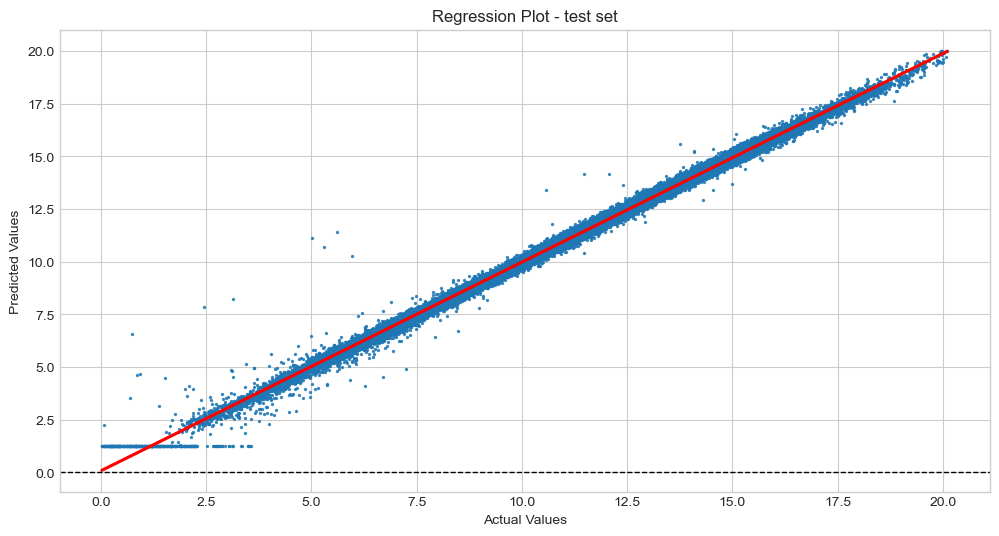

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\2037702613.py:148: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


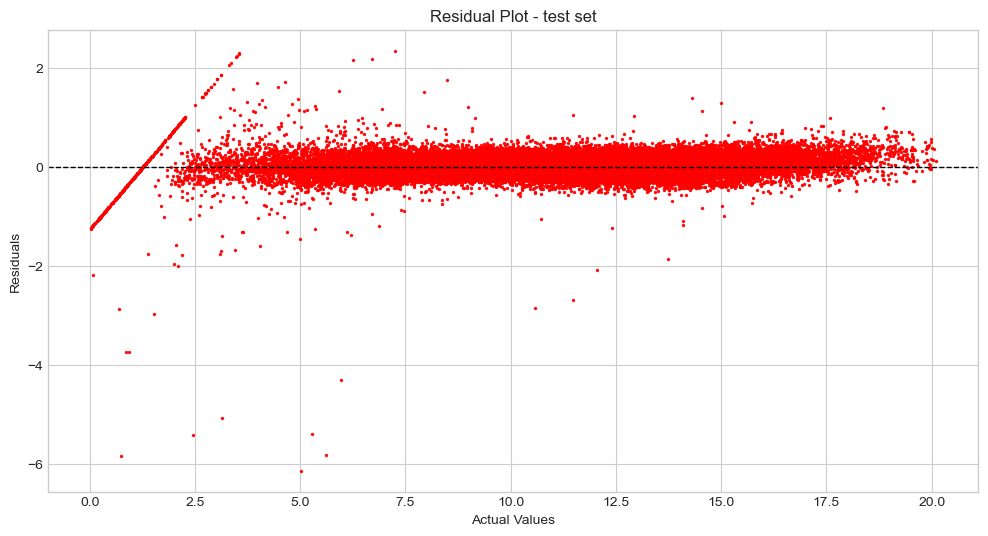

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\2037702613.py:159: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


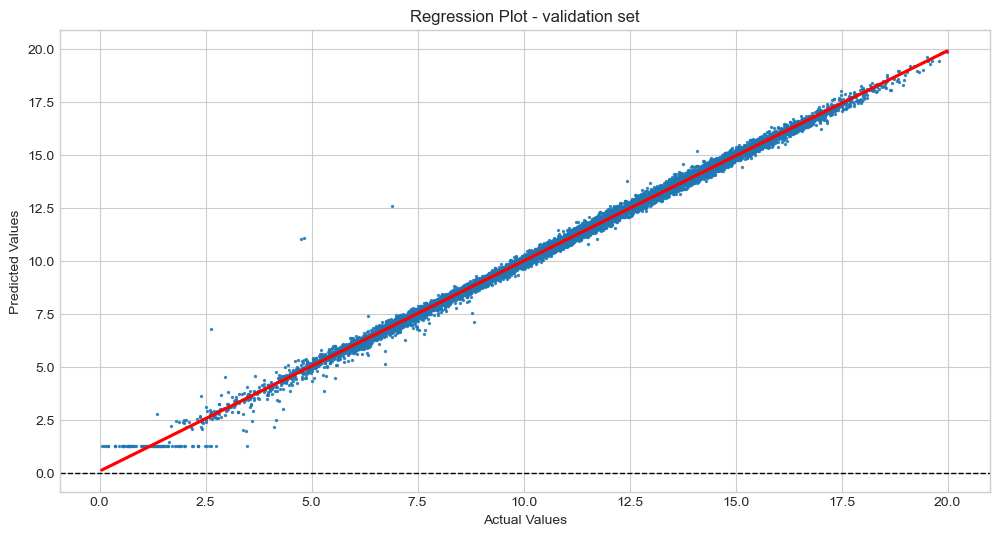

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\2037702613.py:171: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


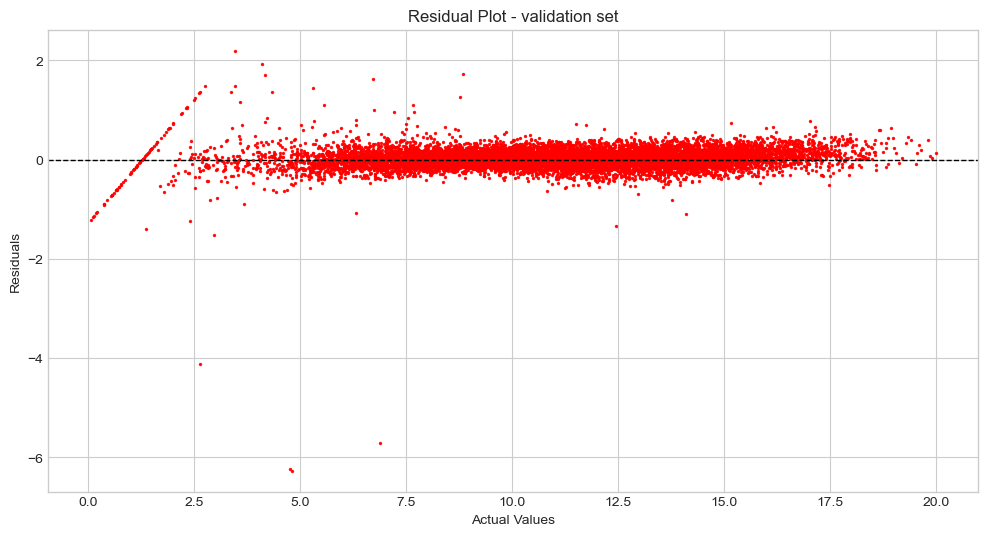

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Load your dataset and preprocess it if necessary (X and Y should be defined)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2230)

# Define the neural network model
model = Sequential()
model.add(Dense(2516, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Create a list to store training history for plotting
history = []

# Define a custom callback to track learning rate during training
class LearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        history.append(model.optimizer.lr.numpy())

# Create an instance of the custom callback
lr_callback = LearningRateCallback()

# Train the model
epochs = 50
batch_size = 64

training_history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.25,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        lr_callback
    ]
)

# Evaluate the model on the test set
mse = model.evaluate(X_test, Y_test)
print(f'Mean Squared Error on Test Data: {mse}')

# Make predictions on the test data
Y_pred = model.predict(X_test)

valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')
X_Valid = valid_data.drop('Combo IC50', axis = 1)
Y_Valid = valid_data['Combo IC50']
Y_Valid = pd.DataFrame(Y_Valid)
# Make predictions on the validation data
Y_Valid_pred = model.predict(X_Valid)


r_squared = r2_score(Y_test, Y_pred)
print(f'R-squared (R²): {r_squared}')

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


r_squared = r2_score(Y_Valid, Y_Valid_pred)
print(f'R-squared validation set (R²): {r_squared}')
rmse = np.sqrt(mean_squared_error(Y_Valid, Y_Valid_pred))
print("Root Mean Squared Error:", rmse)


# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_test, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_Valid, y=Y_Valid_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_Valid - Y_Valid_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_Valid, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Epoch 1/20
754/754 [==============================] - 47s 61ms/step - loss: 4.2564 - val_loss: 0.5494
Epoch 2/20
754/754 [==============================] - 45s 60ms/step - loss: 0.5087 - val_loss: 0.2060
Epoch 3/20
754/754 [==============================] - 46s 60ms/step - loss: 0.3003 - val_loss: 0.1264
Epoch 4/20
754/754 [==============================] - 46s 61ms/step - loss: 0.2075 - val_loss: 0.0950
Epoch 5/20
754/754 [==============================] - 45s 60ms/step - loss: 0.1768 - val_loss: 0.1229
Epoch 6/20
754/754 [==============================] - 45s 60ms/step - loss: 0.1456 - val_loss: 0.0790
Epoch 7/20
754/754 [==============================] - 46s 61ms/step - loss: 0.1235 - val_loss: 0.0768
Epoch 8/20
754/754 [==============================] - 45s 60ms/step - loss: 0.1154 - val_loss: 0.0492
Epoch 9/20
754/754 [==============================] - 45s 60ms/step - loss: 0.1099 - val_loss: 0.0723
Epoch 10/20
754/754 [==============================] - 45s 60ms/step - loss: 0.100

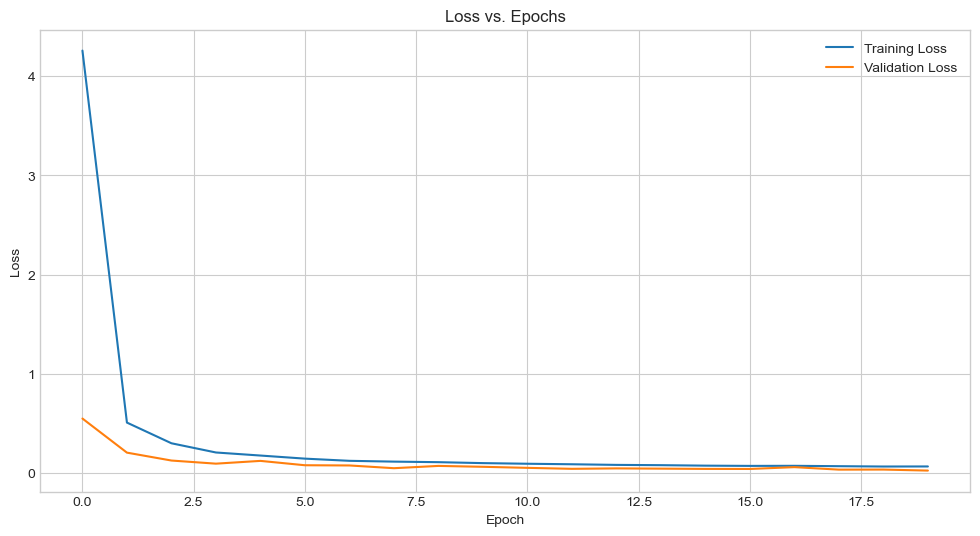

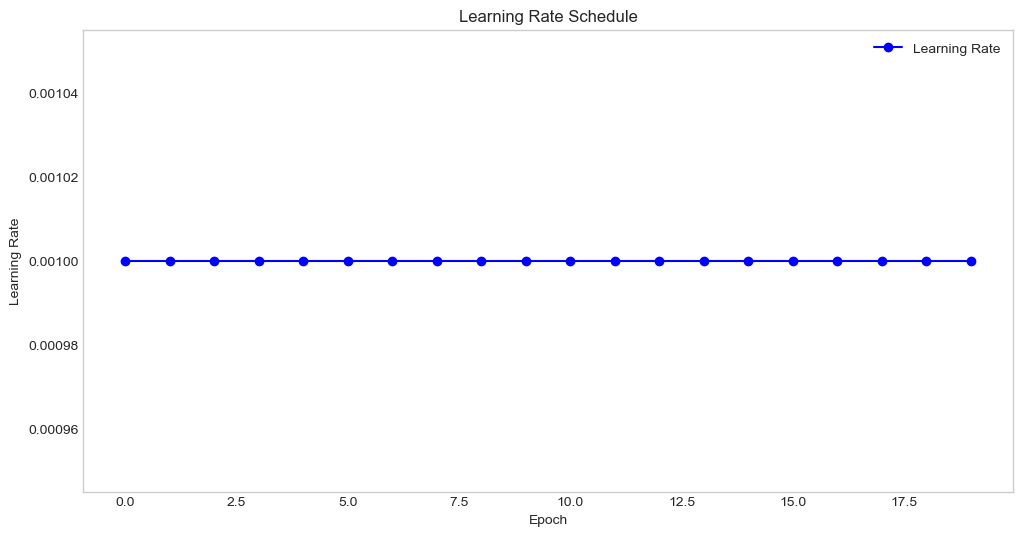

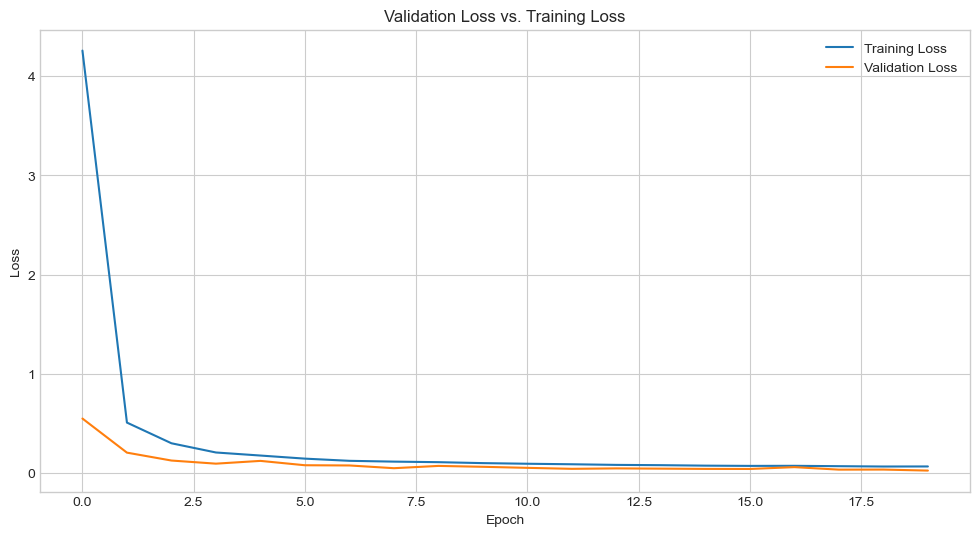

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\1532887538.py:142: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


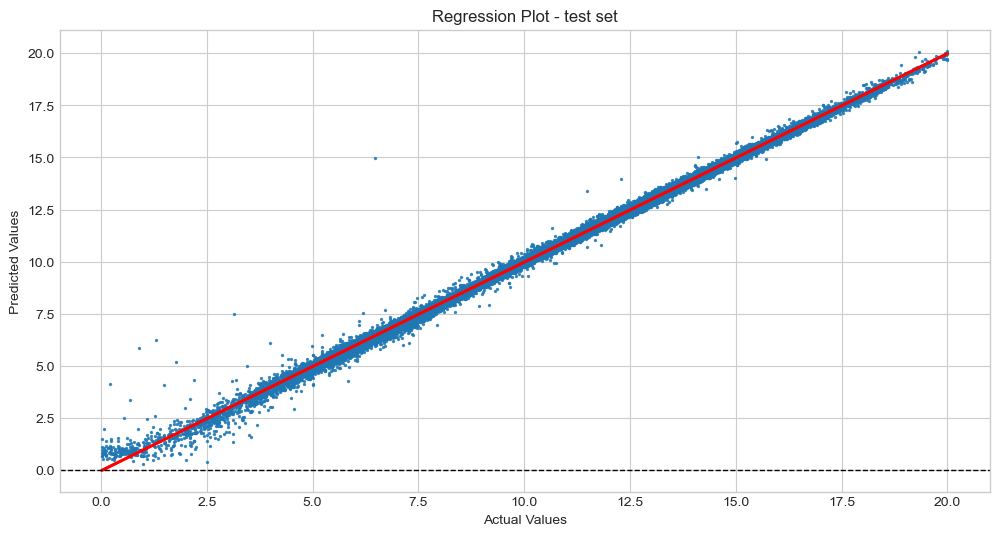

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\1532887538.py:154: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


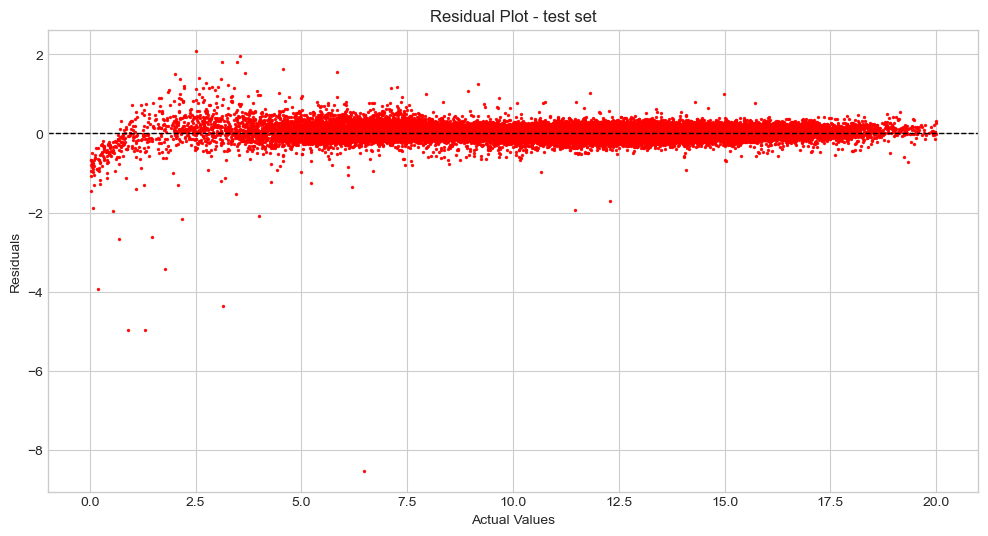

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\1532887538.py:165: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


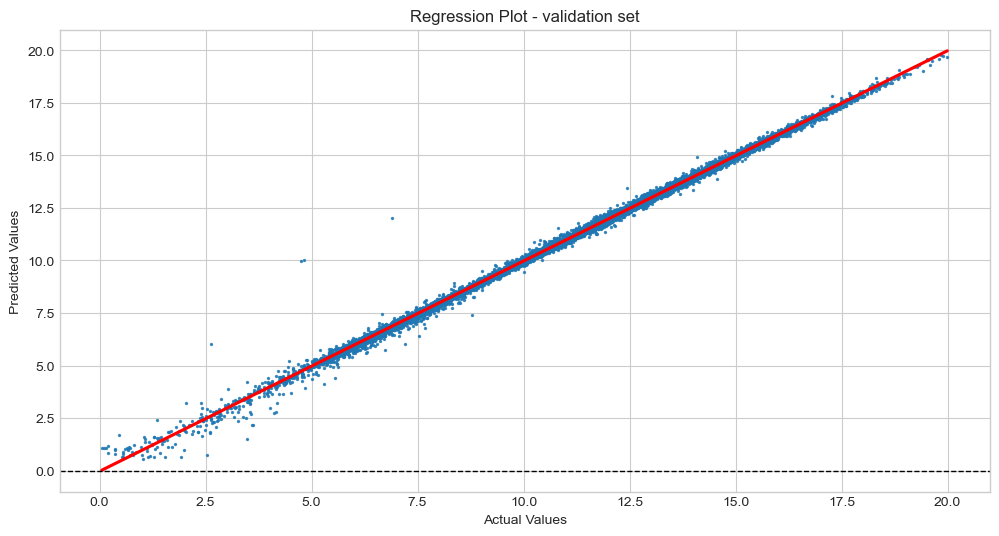

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\1532887538.py:177: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


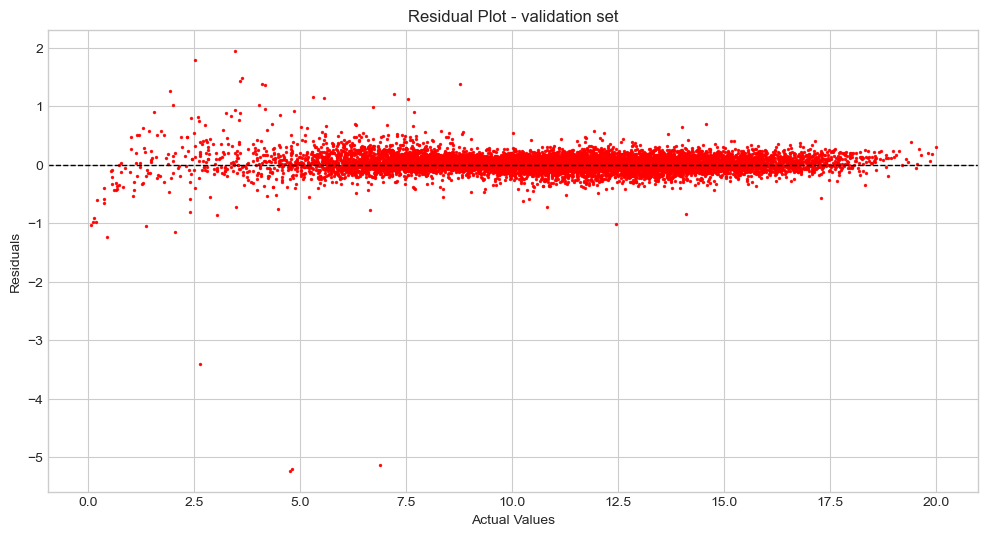

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from tensorflow.keras.optimizers import SGD

# Load your dataset and preprocess it if necessary (X and Y should be defined)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2564)

# Define the neural network model
model = Sequential()
model.add(Dense(2516, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))


optimizer = SGD(learning_rate = 0.00100, momentum = 0.9)
# Compile the model with the custom learning rate schedule
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Create a list to store training history for plotting
history = []

# Define a custom callback to track learning rate during training
class LearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        history.append(model.optimizer.lr.numpy())

# Create an instance of the custom callback
lr_callback = LearningRateCallback()

# Train the model
epochs = 20
batch_size = 100

training_history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.25,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        lr_callback
    ]
)

# Evaluate the model on the test set
mse = model.evaluate(X_test, Y_test)
print(f'Mean Squared Error on Test Data: {mse}')

# Make predictions on the test data
Y_pred = model.predict(X_test)

valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')
X_Valid = valid_data.drop('Combo IC50', axis = 1)
Y_Valid = valid_data['Combo IC50']
Y_Valid = pd.DataFrame(Y_Valid)
# Make predictions on the validation data
Y_Valid_pred = model.predict(X_Valid)


r_squared = r2_score(Y_test, Y_pred)
print(f'R-squared (R²): {r_squared}')

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


r_squared = r2_score(Y_Valid, Y_Valid_pred)
print(f'R-squared validation set (R²): {r_squared}')
rmse = np.sqrt(mean_squared_error(Y_Valid, Y_Valid_pred))
print("Root Mean Squared Error:", rmse)


# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_test, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_Valid, y=Y_Valid_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_Valid - Y_Valid_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_Valid, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Epoch 1/20
754/754 [==============================] - 75s 99ms/step - loss: 2.1273 - val_loss: 0.7939
Epoch 2/20
754/754 [==============================] - 74s 98ms/step - loss: 0.4439 - val_loss: 0.3055
Epoch 3/20
754/754 [==============================] - 74s 99ms/step - loss: 0.2632 - val_loss: 0.1937
Epoch 4/20
754/754 [==============================] - 75s 100ms/step - loss: 0.1901 - val_loss: 0.2033
Epoch 5/20
754/754 [==============================] - 74s 99ms/step - loss: 0.1492 - val_loss: 0.1309
Epoch 6/20
754/754 [==============================] - 77s 102ms/step - loss: 0.1292 - val_loss: 0.0934
Epoch 7/20
754/754 [==============================] - 75s 100ms/step - loss: 0.1140 - val_loss: 0.1212
Epoch 8/20
754/754 [==============================] - 74s 98ms/step - loss: 0.1024 - val_loss: 0.0556
Epoch 9/20
754/754 [==============================] - 74s 98ms/step - loss: 0.0933 - val_loss: 0.0992
Epoch 10/20
754/754 [==============================] - 74s 98ms/step - loss: 0.

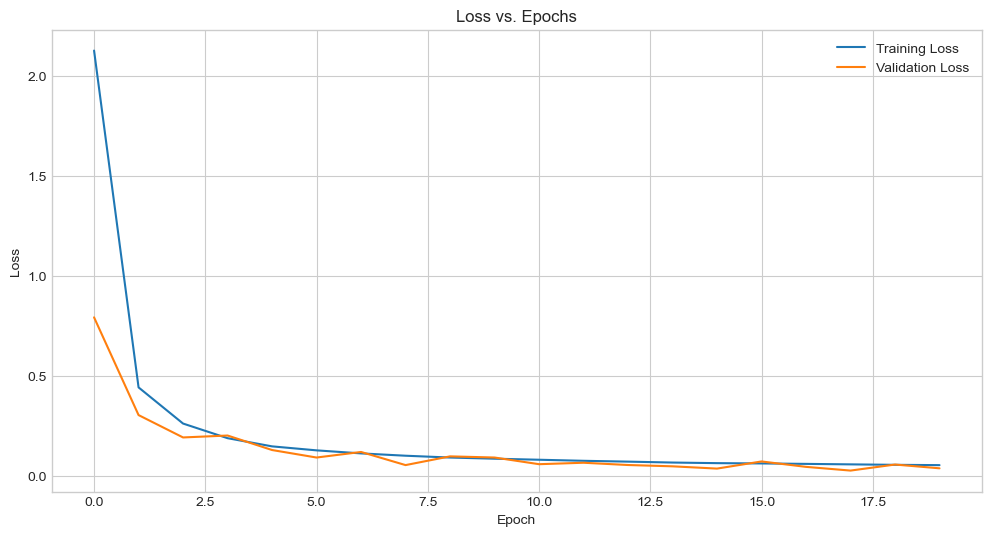

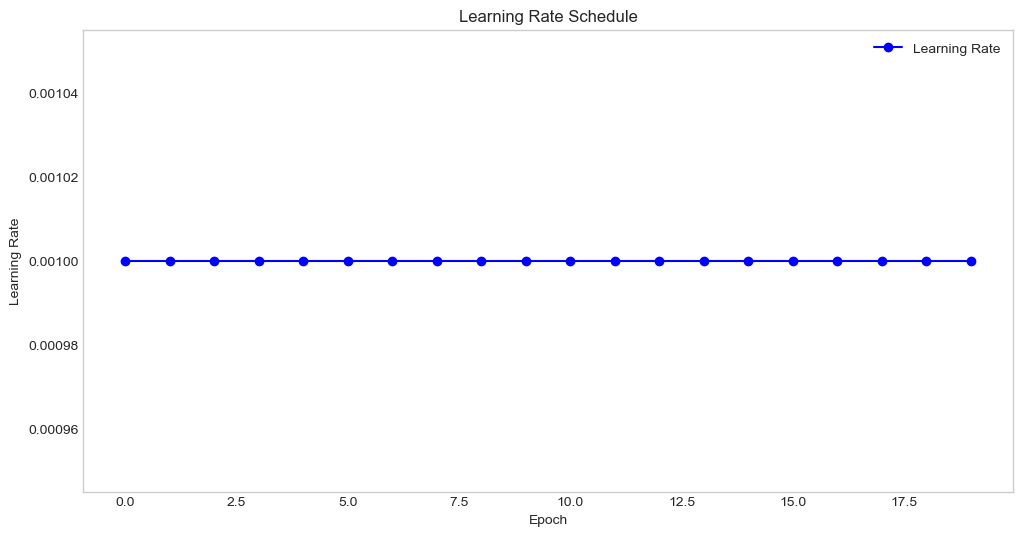

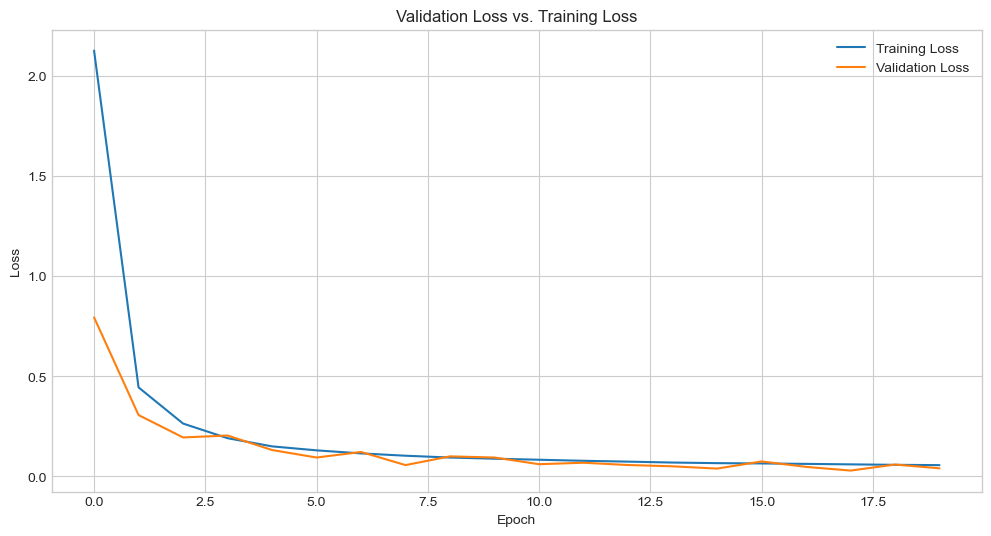

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\418077113.py:142: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


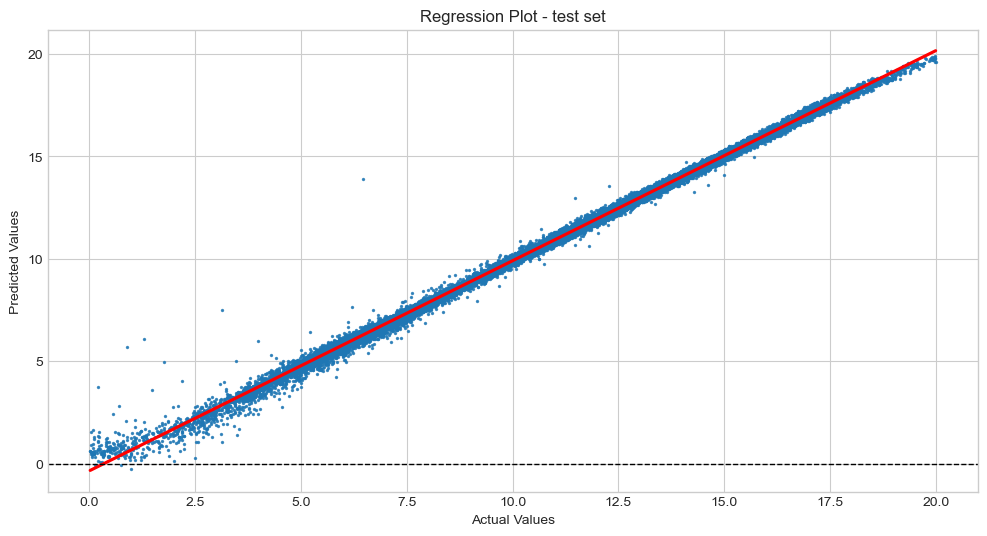

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\418077113.py:154: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


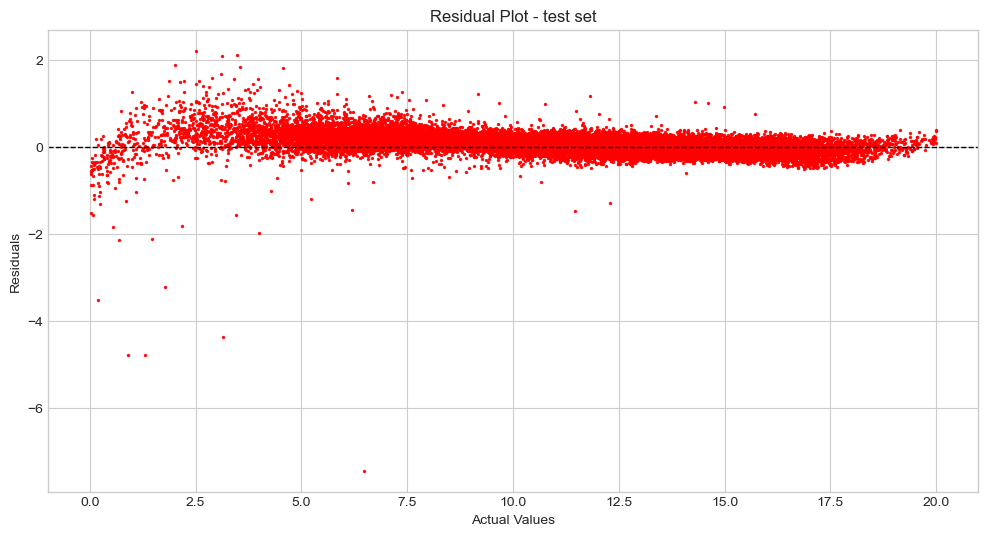

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\418077113.py:165: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


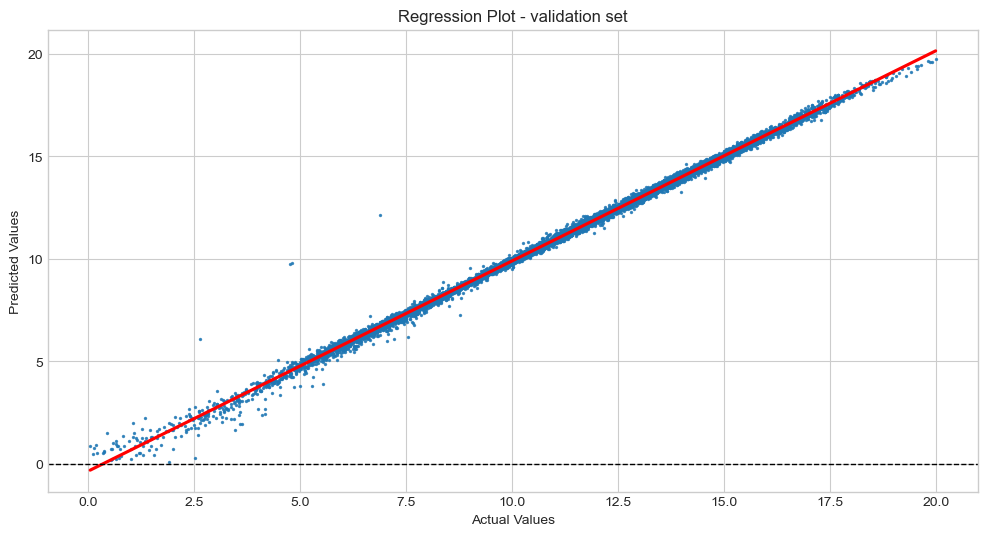

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\418077113.py:177: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


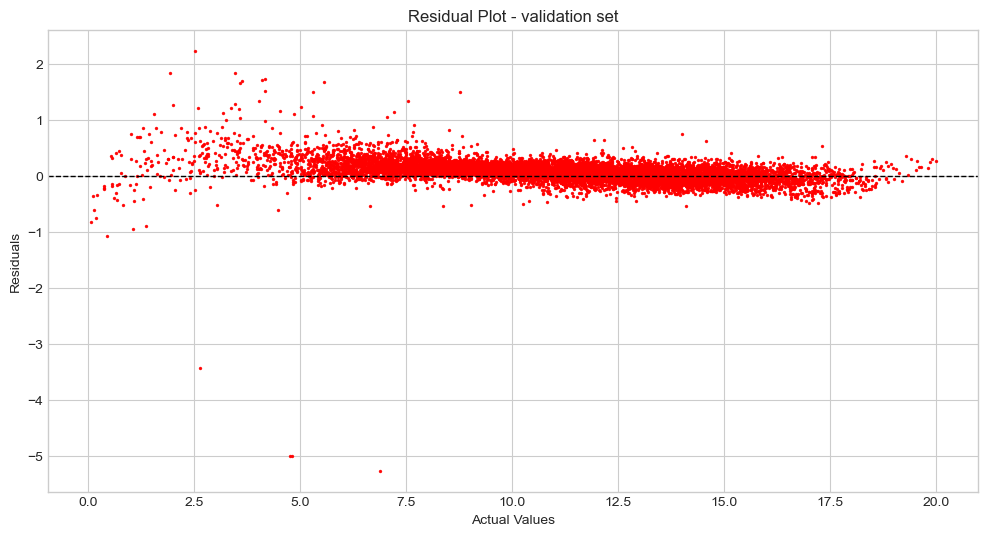

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from tensorflow.keras.optimizers import SGD

# Load your dataset and preprocess it if necessary (X and Y should be defined)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2564)

# Define the neural network model
model = Sequential()
model.add(Dense(2516, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(Dense(2000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='elu'))
model.add(Dense(1000, activation='elu'))
model.add(Dense(1, activation='linear'))


optimizer = SGD(learning_rate = 0.00100, momentum = 0.9)
# Compile the model with the custom learning rate schedule
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Create a list to store training history for plotting
history = []

# Define a custom callback to track learning rate during training
class LearningRateCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        history.append(model.optimizer.lr.numpy())

# Create an instance of the custom callback
lr_callback = LearningRateCallback()

# Train the model
epochs = 20
batch_size = 100

training_history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.25,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        lr_callback
    ]
)

# Evaluate the model on the test set
mse = model.evaluate(X_test, Y_test)
print(f'Mean Squared Error on Test Data: {mse}')

# Make predictions on the test data
Y_pred = model.predict(X_test)

valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')
X_Valid = valid_data.drop('Combo IC50', axis = 1)
Y_Valid = valid_data['Combo IC50']
Y_Valid = pd.DataFrame(Y_Valid)
# Make predictions on the validation data
Y_Valid_pred = model.predict(X_Valid)


r_squared = r2_score(Y_test, Y_pred)
print(f'R-squared (R²): {r_squared}')

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


r_squared = r2_score(Y_Valid, Y_Valid_pred)
print(f'R-squared validation set (R²): {r_squared}')
rmse = np.sqrt(mean_squared_error(Y_Valid, Y_Valid_pred))
print("Root Mean Squared Error:", rmse)


# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_test, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - test set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_Valid, y=Y_Valid_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_Valid - Y_Valid_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_Valid, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - validation set')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Cross-Validation Scores: [0.98100969 0.97928717 0.97698105 0.98159414 0.97917299 0.97928139
 0.98040538 0.97851529]


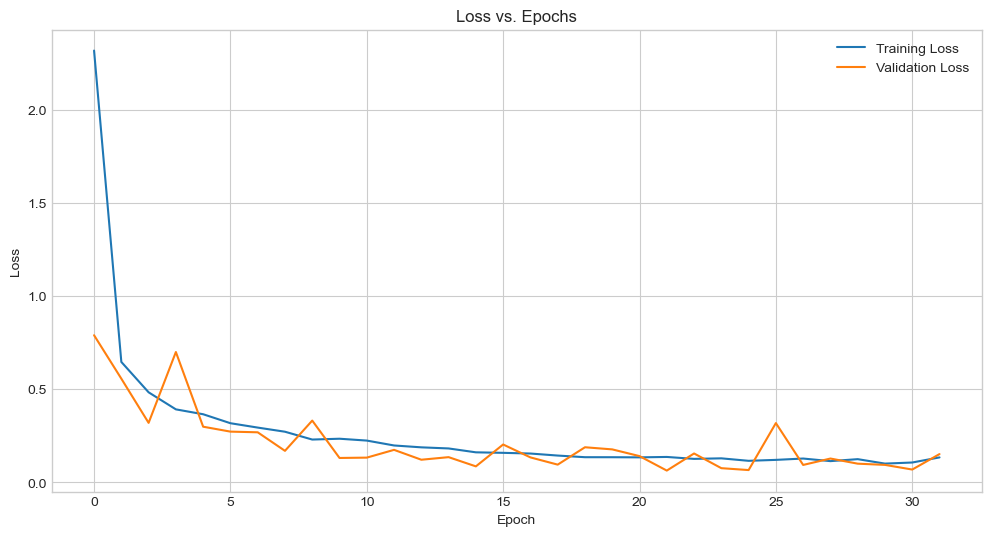

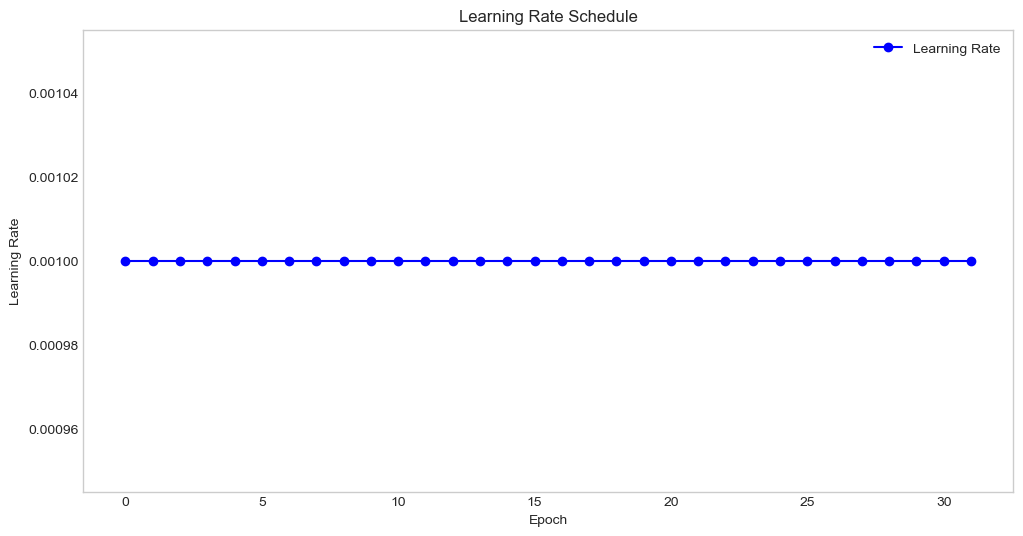

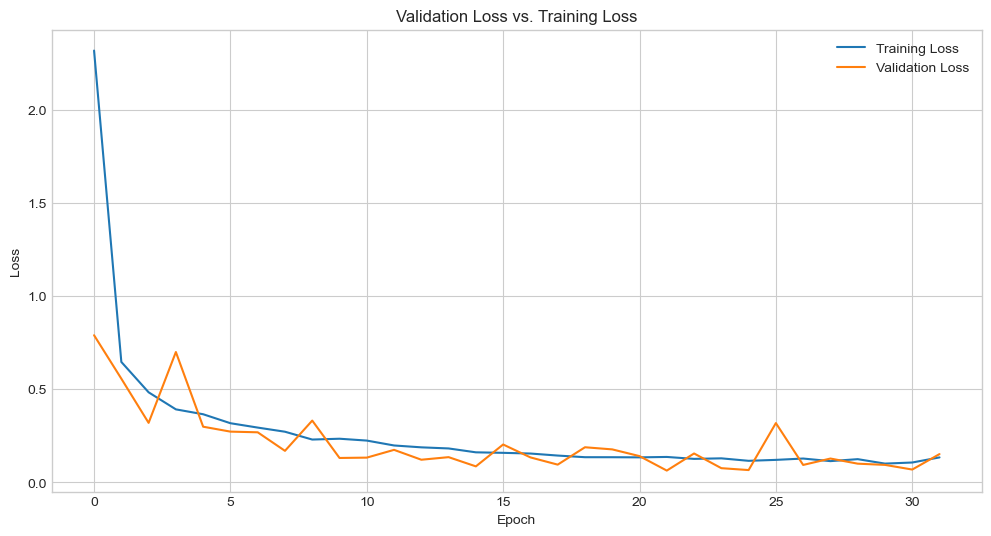

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


# Plot Loss vs. Epochs
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plot Learning Rate Schedule
plt.figure(figsize=(12, 6))
plt.plot(history, label='Learning Rate', marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss vs. Training Loss
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Training Loss')
plt.legend()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\3508503620.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


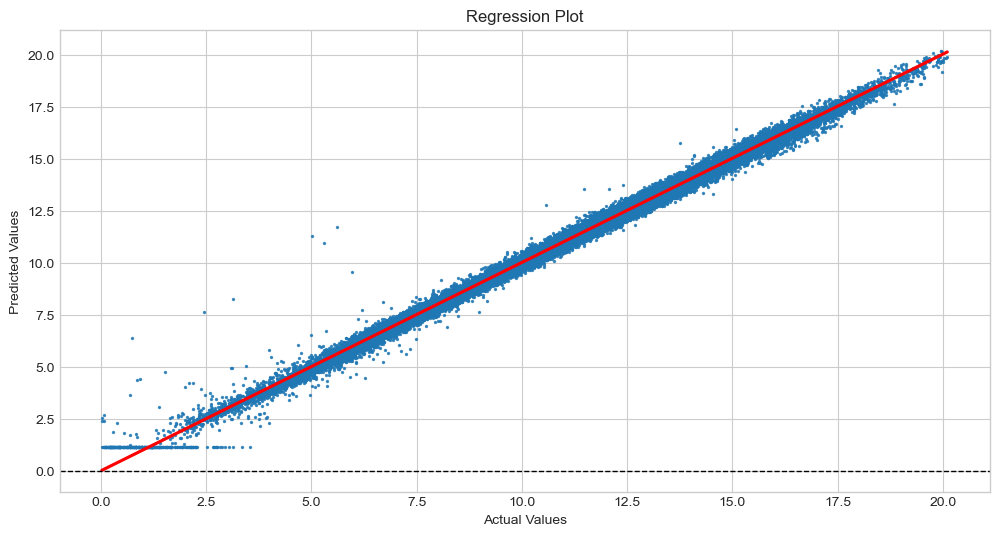

C:\Users\Admin\AppData\Local\Temp\ipykernel_9420\3508503620.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


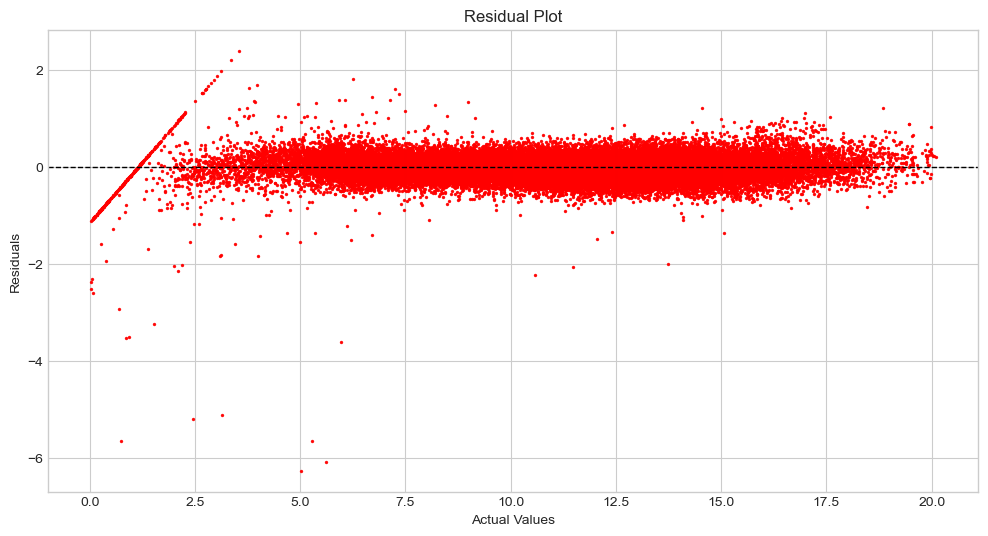

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a regression plot with a regression line
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Regression Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Create a residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(Y_test, residuals, color='red', alpha=0.9, s=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()